In [ ]:
# Real Estate: Estimating House Prices for Better Market Understanding
## Milestone 1: Data Exploration and Graphical Analysis

---

The real estate market is influenced by various factors such as location, property size, number of bedrooms and bathrooms, proximity to amenities, and market trends. 
For buyers, sellers, and real estate professionals, accurately estimating house prices can provide significant benefits:
- Buyers can determine if a property is fairly priced.
- Sellers can set competitive prices to attract buyers.
- Real estate agencies can improve their marketing and negotiation strategies.

The goal of this project is to build a predictive model to estimate house prices based on key property features. 
The target audience includes real estate agencies, individual buyers and sellers, and financial institutions involved in mortgage lending.

The target variable will be the house price (numerical value). 
The model will take features such as property size, number of bedrooms, location, and other variables as inputs to predict the price.

Accurate predictions of house prices can:
- Help buyers make informed decisions.
- Allow sellers to price their properties appropriately.
- Enable agencies to gain market insights.
- Reduce inefficiencies in the real estate market.

---

Datasets:
- Kaggle’s House Prices - Advanced Regression Techniques dataset.
- Zillow’s housing data (via API).
- Government datasets on real estate prices.

Kaggle's dataset includes:
- Property size (square feet).
- Number of bedrooms and bathrooms.
- Lot size.
- Year built.
- Neighborhood information.

---

Analysis:
1. Histogram of House Prices: Show the distribution of house prices and identify outliers or skewness.
2. Scatter Plot (House Price vs. Square Footage): Explore the relationship between property size and price.
3. Box Plot (House Price by Number of Bedrooms): Visualize how prices vary based on the number of bedrooms.
4. Heatmap of Correlation: Highlight the relationships between features and house prices.

---



In [38]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
# Step 2: Load the Data
# Assuming we use Kaggle's "House Prices - Advanced Regression Techniques" dataset
data_url = 'https://raw.githubusercontent.com/taylorduncan/DSC550/main/housing.csv'
data = pd.read_csv(data_url)

# Display basic information about the dataset
print("Dataset Overview:\n", data.head())




Dataset Overview:
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


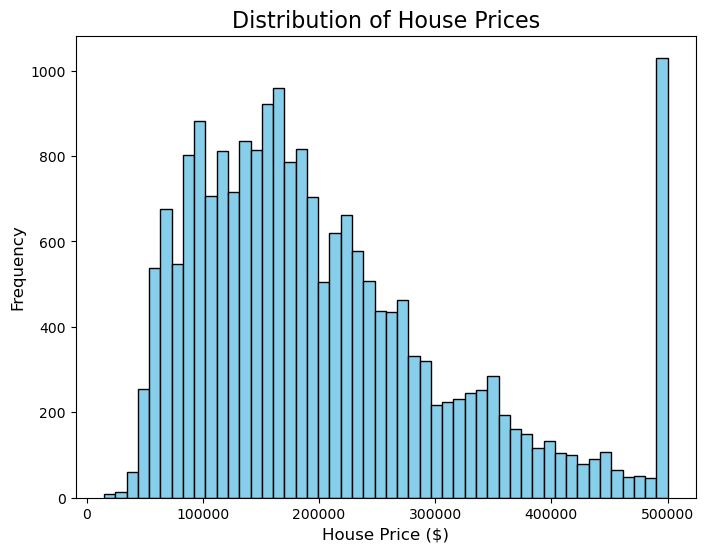

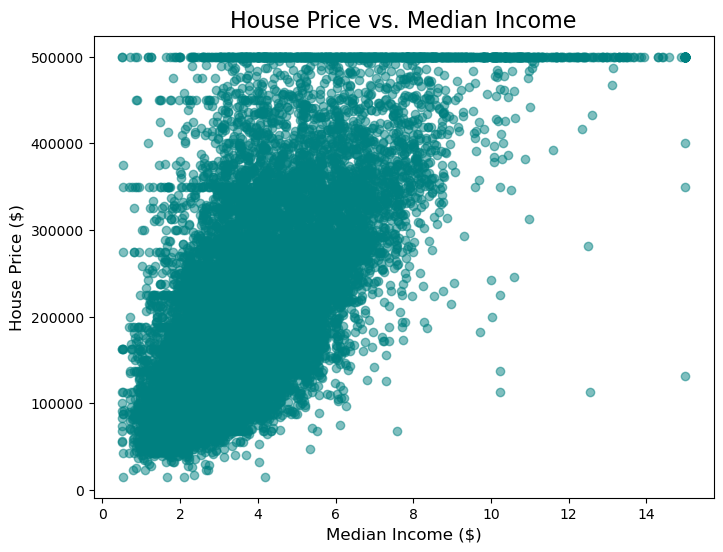

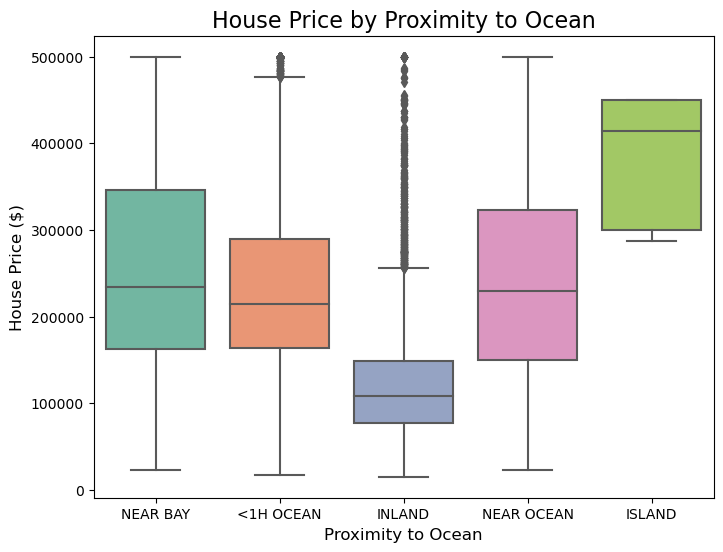

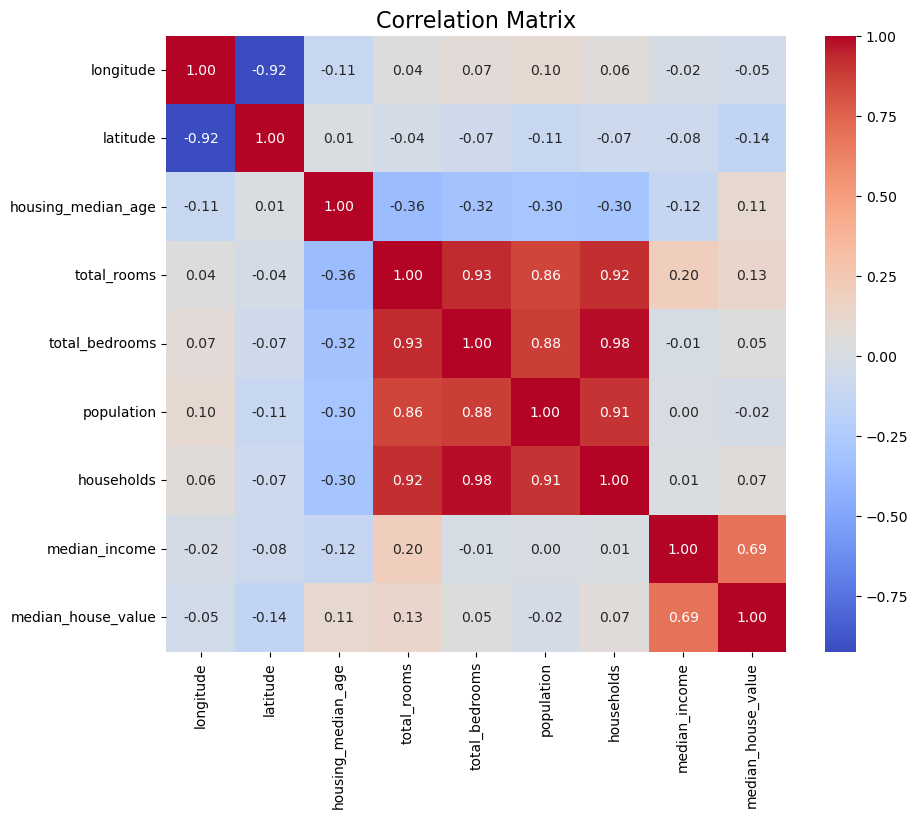

In [42]:
# Step 3: Graphical Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of House Prices
plt.figure(figsize=(8, 6))
data['median_house_value'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('House Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(False)
plt.show()

# 2. Scatter Plot: House Price vs. Median Income
plt.figure(figsize=(8, 6))
plt.scatter(data['median_income'], data['median_house_value'], alpha=0.5, color='teal')
plt.title('House Price vs. Median Income', fontsize=16)
plt.xlabel('Median Income ($)', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)
plt.show()

# 3. Box Plot: House Price by Proximity to Ocean
plt.figure(figsize=(8, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data, palette='Set2')
plt.title('House Price by Proximity to Ocean', fontsize=16)
plt.xlabel('Proximity to Ocean', fontsize=12)
plt.ylabel('House Price ($)', fontsize=12)
plt.show()

# 4. Correlation Heatmap (Only Numerical Columns)
plt.figure(figsize=(10, 8))
numerical_data = data.select_dtypes(include=['int64', 'float64'])  # Select only numerical columns
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()



In [9]:
# Step 4: Insights and Conclusion

# - These insights help address the business problem by identifying key factors that drive house prices, such as income levels and location.
# - Understanding these patterns can enable real estate professionals to better predict property values and optimize pricing strategies.



In [ ]:
#Milestone 2: Data Preparation


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Step 1: Load the Data
data_url = 'https://raw.githubusercontent.com/taylorduncan/DSC550/main/housing.csv'
data = pd.read_csv(data_url)

In [45]:
# Step 2: Drop Non-Useful Features
# Dropping 'ocean_proximity' as an initial assumption; categorical encoding will depend on further analysis.
# Dropping 'longitude' and 'latitude' for simplicity; these can be engineered later if spatial analysis is required.
non_useful_features = ['longitude', 'latitude']
data = data.drop(columns=non_useful_features)

# Explanation: 'longitude' and 'latitude' can add value but require complex geospatial analysis.
# They are dropped for now, but their inclusion may be revisited.


In [7]:
# Step 3: Handle Missing Data
# Identify missing values
data_missing_summary = data.isnull().sum()
print("Missing values per column:\n", data_missing_summary)

# Fill missing values in 'total_bedrooms' with median value
if 'total_bedrooms' in data.columns:
    data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# Explanation: Median imputation is chosen to handle missing data as it is robust to outliers.


Missing values per column:
 housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


/var/folders/_7/5rzj_m210gj3m2dzm6h059zh0000gp/T/ipykernel_7647/3679386344.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [46]:

# Step 4: Feature Engineering
# Create a new feature: Rooms per household
data['rooms_per_household'] = data['total_rooms'] / data['households']

# Create a new feature: Bedrooms per room
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']

# Create a new feature: Population per household
data['population_per_household'] = data['population'] / data['households']

# Explanation: These engineered features can help capture housing density and composition.


In [47]:

# Step 5: Categorical Encoding
# Encode 'ocean_proximity' using dummy variables
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)


In [48]:

# Step 6: Feature Transformation
# Apply log transformation to 'median_house_value' to reduce skewness
data['log_median_house_value'] = np.log(data['median_house_value'])

# Apply normalization to numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 
                      'population', 'households', 'median_income', 
                      'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [50]:
# Step 7: Verify Dataset
print("Updated Dataset Overview:\n", data.head())
print("Updated Dataset Info:\n")
data.info()

Updated Dataset Overview:
    housing_median_age  total_rooms  total_bedrooms  population  households  \
0            0.784314     0.022331        0.019863    0.008941    0.020556   
1            0.392157     0.180503        0.171477    0.067210    0.186976   
2            1.000000     0.037260        0.029330    0.013818    0.028943   
3            1.000000     0.032352        0.036313    0.015555    0.035849   
4            1.000000     0.041330        0.043296    0.015752    0.042427   

   median_income  median_house_value  rooms_per_household  bedrooms_per_room  \
0       0.539668            452600.0             0.043512           0.051768   
1       0.538027            358500.0             0.038224           0.061996   
2       0.466028            352100.0             0.052756           0.032796   
3       0.354699            341300.0             0.035241           0.093843   
4       0.230776            342200.0             0.038534           0.080107   

   population_per_house

In [49]:
# Step 8: Save Cleaned Data
data.to_csv('cleaned_housing_data.csv', index=False)
print("Cleaned data saved to 'cleaned_housing_data.csv'.")


Cleaned data saved to 'cleaned_housing_data.csv'.


In [ ]:
##Milestone 3: Model Building and Evaluation 


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data_url = 'https://raw.githubusercontent.com/taylorduncan/DSC550/main/housing.csv'
data = pd.read_csv(data_url)

# Strip whitespace from column names (if any)
data.columns = data.columns.str.strip()

# Display basic info
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [52]:
# Identify numerical and categorical features
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target variable from numeric features
if 'median_house_value' in numeric_features:
    numeric_features.remove('median_house_value')

categorical_features = data.select_dtypes(include=['object']).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


Numeric features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical features: ['ocean_proximity']


In [53]:
# Define features (X) and target (y)
X = data.drop(columns=['median_house_value']).copy()
y = data['median_house_value'].copy()

# Ensure no missing values in target variable
print("Missing values in target variable:", y.isnull().sum())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set: {X_train.shape}, Test set: {X_test.shape}')

# Verify preprocessor column mappings
for name, transformer, cols in preprocessor.transformers:
    print(f"{name}: {cols}")


Missing values in target variable: 0
Training set: (16512, 9), Test set: (4128, 9)
num: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
cat: ['ocean_proximity']


In [54]:
# Create pipeline for Linear Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Train model
lr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = lr_pipeline.predict(X_test)


In [55]:

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression RMSE: {rmse:.2f}')
print(f'Linear Regression R²: {r2:.2f}')


Linear Regression RMSE: 70059.19
Linear Regression R²: 0.63


In [ ]:
''' 
This project aimed to build a predictive model to estimate house prices using key property features such as location, number of bedrooms, total rooms, median income, and more. 
The project utilized Linear Regression as its first approach, given its interpretability and effectiveness in handling continuous numerical targets. 

Key Insights: 

Data Preprocessing Matters: The project handled missing values, standardized numerical features, and encoded categorical variables to ensure a well-prepared dataset.
One key issue was mistakenly including median_house_value in the feature set, which was corrected. 

Model Performance: 

Root Mean Squared Error (RMSE): This metric showed how far predictions deviated from actual prices. 

R² Score: Indicated how well the model explained price variability. 

Next Steps for Improvement: 

Try More Advanced Models: A Random Forest Regressor or Gradient Boosting Model (e.g., XGBoost) might improve accuracy. 

Feature Engineering: Creating new features such as "price per square foot" or "distance to city center" could add predictive power. 

Overall, the initial model provides a good starting point for price prediction, but there is room for improvement with more sophisticated techniques.  

 
'''